# Immo proyect

### Introduction

### 0. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')

### **Import** Data

In [2]:
df_raw = pd.read_csv('data/all_data_frame.csv', low_memory=False)

In [3]:
df_raw.shape

(18479, 127)

### Clean **Duplicated** Data

In [4]:
df_raw.duplicated(subset='url').sum()

1106

In [5]:
df_raw = df_raw.drop_duplicates()

In [6]:
df_raw.shape

(17373, 127)

### **Formating** the data in the DataFrame

#### Numbers

In [7]:
def keep_digits(df,column, type_of_digit=float):
        df[column] = df[column].str.extract('(\d+)').astype(type_of_digit).fillna(0)

In [ ]:
atrributes_to_numbers = ['Living area','Surface of the plot','Garden surface','Terrace surface','Price']

for attribute in atrributes_to_numbers:
    keep_digits(df_raw,str("'{attribute'"),float)

In [8]:
keep_digits(df_raw,'Living area', float)
keep_digits(df_raw,'Surface of the plot', float)
keep_digits(df_raw,'Garden surface', float)
keep_digits(df_raw,'Terrace surface', float)

In [9]:
df_raw['Price'] = df_raw['Price'].str.extract('(\d+,\d+)')
df_raw['Price'] = df_raw['Price'].str.replace(',','').astype(float)

In [10]:
df_raw[['Living area','Surface of the plot','Garden surface','Terrace surface','Price']].head(10)

,Living area,Surface of the plot,Garden surface,Terrace surface,Price
0,122.0,335.0,171.0,20.0,159000.0
1,119.0,49.0,0.0,0.0,345000.0
2,200.0,300.0,200.0,12.0,895000.0
3,404.0,1000.0,1000.0,52.0,570000.0
4,350.0,263.0,140.0,0.0,800000.0
5,130.0,991.0,0.0,14.0,425000.0
6,306.0,460.0,215.0,12.0,450000.0
7,200.0,360.0,0.0,0.0,750000.0
8,1010.0,16959.0,15324.0,80.0,849000.0
9,165.0,610.0,430.0,0.0,129000.0


#### Yes = 1 or No = 0

In [11]:
def yes_no_to_bin(df,column):
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [12]:
yes_no_to_bin(df_raw,'Furnished')
yes_no_to_bin(df_raw,'Swimming pool')
yes_no_to_bin(df_raw,'Terrace')
yes_no_to_bin(df_raw,'Garden')

In [13]:
df_raw['Kitchen type']= df_raw['Kitchen type'].map({'Semi equipped': 0, 'USA installed': 0, 'Installed': 0, 'Hyper equipped': 1, 'Not installed': 0, 
'USA semi equipped': 1, 'USA hyper equipped': 1,  'USA uninstalled': 0})

df_raw['Kitchen type']= df_raw['Kitchen type'].map({'Semi equipped': 0.5, 'USA installed': 0.75, 'Installed': 0.75, 'Hyper equipped': 1.0, 'Not installed': 0.0, 
'USA semi equipped': 0.5, 'USA hyper equipped': 1.0,  'USA uninstalled': 0.75})

In [14]:
df_raw[['Furnished','Swimming pool','Terrace','Garden','Kitchen type']]

,Furnished,Swimming pool,Terrace,Garden,Kitchen type
0,0.0,0.0,NaN,NaN,0.0
1,0.0,0.0,NaN,NaN,0.0
2,NaN,0.0,NaN,NaN,0.0
3,0.0,0.0,NaN,NaN,1.0
4,0.0,NaN,1.0,NaN,0.0
...,...,...,...,...,...
18474,NaN,0.0,1.0,NaN,NaN
18475,0.0,NaN,NaN,NaN,0.0
18476,0.0,NaN,NaN,NaN,0.0
18477,0.0,NaN,NaN,NaN,0.0


### Detecting **null values** in the data

In [15]:
total_elements = df_raw.shape[0]
total_elements

17373

for column in df_raw:
    print(f'{column} : {df_raw[column].isnull().sum()} , missing values: {round((df_raw[column].isnull().sum()/total_elements)*100,2)}%')

### Clasify the data in accordace of their null values

In [16]:
usable_attributes_list = []
unusable_attributes_list = []
treshold = 30

In [17]:
for column in df_raw:
    if round((df_raw[column].isnull().sum()/total_elements)*100,2) > treshold :
        unusable_attributes_list.append(column)
    else:
        usable_attributes_list.append(column)

In [18]:
print('usable_attributes_list',len(usable_attributes_list))
for attribute in usable_attributes_list:
    print(f'missing values: {round((df_raw[attribute].isnull().sum()/total_elements)*100,2)}% {attribute} ')

usable_attributes_list 29
missing values: 18.01% Building condition 
missing values: 24.75% Number of frontages 
missing values: 0.0% Living area 
missing values: 25.46% Kitchen type 
missing values: 2.15% Bedrooms 
missing values: 13.24% Bathrooms 
missing values: 17.18% Toilets 
missing values: 23.45% Furnished 
missing values: 0.0% Surface of the plot 
missing values: 0.0% Garden surface 
missing values: 0.0% Terrace surface 
missing values: 0.33% Primary energy consumption 
missing values: 0.33% Energy class 
missing values: 15.15% Unnamed: 36 
missing values: 0.37% Reference number of the EPC report 
missing values: 0.33% CO₂ emission 
missing values: 0.33% Yearly theoretical total energy consumption 
missing values: 23.91% Heating type 
missing values: 18.76% Double glazing 
missing values: 3.47% Price 
missing values: 5.49% Address 
missing values: 22.52% Website 
missing values: 18.72% External reference 
missing values: 0.0% subtype_of_property 
missing values: 0.0% type_of_pr

In [19]:
print('unusable_attributes_list',len(unusable_attributes_list))
for attribute in unusable_attributes_list:
    print(f'missing values: {round((df_raw[attribute].isnull().sum()/total_elements)*100,2)}% {attribute} ')

unusable_attributes_list 98
missing values: 34.08% Available as of 
missing values: 84.68% Available date 
missing values: 33.15% Construction year 
missing values: 75.25% Street frontage width 
missing values: 63.02% Surroundings type 
missing values: 84.28% Virtual visit 
missing values: 48.55% Living room surface 
missing values: 80.17% Dining room 
missing values: 56.78% Kitchen surface 
missing values: 45.06% Bedroom 1 surface 
missing values: 50.48% Bedroom 2 surface 
missing values: 72.3% Shower rooms 
missing values: 89.95% Office surface 
missing values: 61.45% Office 
missing values: 59.69% Basement 
missing values: 88.56% Attic 
missing values: 82.36% Width of the lot on the street 
missing values: 69.97% Connection to sewer network 
missing values: 60.78% Gas, water &amp; electricity 
missing values: 46.24% Elevator 
missing values: 57.7% Accessible for disabled people 
missing values: 65.94% TV cable 
missing values: 57.47% Swimming pool 
missing values: 58.48% Planning pe

In [20]:
print(f'{len(usable_attributes_list)}/{len(df_raw.columns.tolist())} (usable attributes / attributes)\nFor a teshold >{treshold }')

29/127 (usable attributes / attributes)
For a teshold >30



### Review if the **missing data** from the **requested information**

In [22]:
requested_attributes_list = ['url',
                             'type_of_property',
                             'subtype_of_property',
                             'Price',
                             'locality',
                             'zip_code',
                             'Construction year',
                             'Building condition',
                             'Number of frontages',
                             'Living area',
                             'Kitchen type',
                             'Bedrooms',
                             'Furnished',
                             'Surface of the plot',
                             'Garden surface',
                             'Terrace surface',
                             'Swimming pool',
                             'type_of_sale',
                             'Terrace',
                             'Garden',
                             'region']

In [23]:
for attribute in requested_attributes_list:
    print(f'missing values: {round((df_raw[attribute].isnull().sum()/total_elements)*100,2)}% {attribute} ')

missing values: 0.0% url 
missing values: 0.0% type_of_property 
missing values: 0.0% subtype_of_property 
missing values: 3.47% Price 
missing values: 0.0% locality 
missing values: 0.0% zip_code 
missing values: 33.15% Construction year 
missing values: 18.01% Building condition 
missing values: 24.75% Number of frontages 
missing values: 0.0% Living area 
missing values: 25.46% Kitchen type 
missing values: 2.15% Bedrooms 
missing values: 23.45% Furnished 
missing values: 0.0% Surface of the plot 
missing values: 0.0% Garden surface 
missing values: 0.0% Terrace surface 
missing values: 57.47% Swimming pool 
missing values: 0.0% type_of_sale 
missing values: 77.33% Terrace 
missing values: 87.87% Garden 


### Select columns from raw_data

In [24]:
df = df_raw[requested_attributes_list]

In [25]:
df

,url,type_of_property,subtype_of_property,Price,locality,zip_code,Construction year,Building condition,Number of frontages,Living area,Kitchen type,Bedrooms,Furnished,Surface of the plot,Garden surface,Terrace surface,Swimming pool,type_of_sale,Terrace,Garden
0,https://www.immoweb.be/en/classified/house/for...,house,house,159000.0,ans,4430,1899.0,Good,2.0,122.0,0.0,2.0,0.0,335.0,171.0,20.0,0.0,for-sale,NaN,NaN
1,https://www.immoweb.be/en/classified/house/for...,house,house,345000.0,gent,9000,1941.0,Good,2.0,119.0,0.0,4.0,0.0,49.0,0.0,0.0,0.0,for-sale,NaN,NaN
2,https://www.immoweb.be/en/classified/villa/for...,house,villa,895000.0,woluwe-saint-pierre,1150,1961.0,To renovate,3.0,200.0,0.0,3.0,NaN,300.0,200.0,12.0,0.0,for-sale,NaN,NaN
3,https://www.immoweb.be/en/classified/villa/for...,house,villa,570000.0,galmaarden,1570,1989.0,As new,4.0,404.0,1.0,4.0,0.0,1000.0,1000.0,52.0,0.0,for-sale,NaN,NaN
4,https://www.immoweb.be/en/classified/apartment...,other,apartment-block,800000.0,forest,1190,1924.0,To be done up,2.0,350.0,0.0,4.0,0.0,263.0,140.0,0.0,NaN,for-sale,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18474,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329000.0,dendermonde,9200,NaN,As new,NaN,126.0,NaN,2.0,NaN,0.0,0.0,0.0,0.0,for-sale,1.0,NaN
18475,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329500.0,blankenberge,8370,NaN,NaN,2.0,84.0,0.0,2.0,0.0,0.0,0.0,6.0,NaN,for-sale,NaN,NaN
18476,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329500.0,blankenberge,8370,NaN,NaN,2.0,80.0,0.0,2.0,0.0,0.0,0.0,18.0,NaN,for-sale,NaN,NaN
18477,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329750.0,blankenberge,8370,NaN,NaN,2.0,90.0,0.0,2.0,0.0,0.0,0.0,9.0,NaN,for-sale,NaN,NaN


In [28]:
df = df.rename({'Construction year':'Construction_year',
                'Building condition':'Building_condition',
                'Number of frontages':'Number_of_frontages',
                'Living area':'Living_area',
                'Kitchen type':'Kitchen_type',
                'Surface of the plot':'Surface_of_the_plot',
                'Garden surface':'Garden_surface',
                'Terrace surface':'Terrace_surface',
                'Swimming pool':'Swimming_pool'}, axis=1)

In [29]:
df

,url,type_of_property,subtype_of_property,Price,locality,zip_code,Construction_year,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Surface_of_the_plot,Garden_surface,Terrace_surface,Swimming_pool,type_of_sale,Terrace,Garden
0,https://www.immoweb.be/en/classified/house/for...,house,house,159000.0,ans,4430,1899.0,Good,2.0,122.0,0.0,2.0,0.0,335.0,171.0,20.0,0.0,for-sale,NaN,NaN
1,https://www.immoweb.be/en/classified/house/for...,house,house,345000.0,gent,9000,1941.0,Good,2.0,119.0,0.0,4.0,0.0,49.0,0.0,0.0,0.0,for-sale,NaN,NaN
2,https://www.immoweb.be/en/classified/villa/for...,house,villa,895000.0,woluwe-saint-pierre,1150,1961.0,To renovate,3.0,200.0,0.0,3.0,NaN,300.0,200.0,12.0,0.0,for-sale,NaN,NaN
3,https://www.immoweb.be/en/classified/villa/for...,house,villa,570000.0,galmaarden,1570,1989.0,As new,4.0,404.0,1.0,4.0,0.0,1000.0,1000.0,52.0,0.0,for-sale,NaN,NaN
4,https://www.immoweb.be/en/classified/apartment...,other,apartment-block,800000.0,forest,1190,1924.0,To be done up,2.0,350.0,0.0,4.0,0.0,263.0,140.0,0.0,NaN,for-sale,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18474,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329000.0,dendermonde,9200,NaN,As new,NaN,126.0,NaN,2.0,NaN,0.0,0.0,0.0,0.0,for-sale,1.0,NaN
18475,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329500.0,blankenberge,8370,NaN,NaN,2.0,84.0,0.0,2.0,0.0,0.0,0.0,6.0,NaN,for-sale,NaN,NaN
18476,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329500.0,blankenberge,8370,NaN,NaN,2.0,80.0,0.0,2.0,0.0,0.0,0.0,18.0,NaN,for-sale,NaN,NaN
18477,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,329750.0,blankenberge,8370,NaN,NaN,2.0,90.0,0.0,2.0,0.0,0.0,0.0,9.0,NaN,for-sale,NaN,NaN


### Expected input from the user
```json
{
  "data": {
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"
    ]
  }
}


### Split Data by Type

In [30]:
df_house = df.loc[df['type_of_property'] == 'house']
df_house.describe()

,Price,zip_code,Construction_year,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Surface_of_the_plot,Garden_surface,Terrace_surface,Swimming_pool,Terrace,Garden
count,7559.000000,7942.000000,4909.000000,6790.000000,7942.000000,6000.000000,7904.000000,6163.000000,7942.000000,7942.000000,7942.000000,2651.000000,2236.0,1403.0
mean,350632.699299,5305.159406,1964.627826,2.999705,196.924830,0.232833,3.803770,0.017848,1147.257618,282.619365,13.826114,0.139947,1.0,1.0
std,208627.155570,3004.021206,39.425580,0.867066,147.166633,0.422672,21.586824,0.132411,6223.792986,2010.703800,56.956828,0.346998,0.0,0.0
min,1000.000000,1000.000000,1800.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,210000.000000,2320.000000,1940.000000,2.000000,128.000000,0.000000,3.000000,0.000000,170.000000,0.000000,0.000000,0.000000,1.0,1.0
50%,325000.000000,4960.000000,1968.000000,3.000000,170.000000,0.000000,3.000000,0.000000,404.000000,0.000000,0.000000,0.000000,1.0,1.0
75%,459000.000000,8420.000000,1993.000000,4.000000,236.000000,0.000000,4.000000,0.000000,949.000000,150.000000,20.000000,0.000000,1.0,1.0
max,999999.000000,9992.000000,2024.000000,8.000000,3970.000000,1.000000,1919.000000,1.000000,420000.000000,150000.000000,3286.000000,1.000000,1.0,1.0


In [31]:
df_apartment = df.loc[df['type_of_property'] == 'apartment']
df_apartment.describe()

,Price,zip_code,Construction_year,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Surface_of_the_plot,Garden_surface,Terrace_surface,Swimming_pool,Terrace,Garden
count,7017.000000,7195.000000,5202.000000,4561.000000,7195.000000,5337.000000,7142.000000,5360.000000,7195.0,7195.000000,7195.000000,3740.000000,1254.0,535.0
mean,327661.969360,4697.387352,1992.490388,2.436746,108.030716,0.417088,2.167040,0.057276,0.0,68.797776,12.229882,0.016845,1.0,1.0
std,191322.824442,3405.320018,32.620227,0.745454,172.047546,0.493124,0.850852,0.232391,0.0,1909.180597,27.159430,0.128707,0.0,0.0
min,1000.000000,1000.000000,1780.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0
25%,215000.000000,1180.000000,1970.000000,2.000000,75.000000,0.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.0
50%,289000.000000,3670.000000,2005.000000,2.000000,96.000000,0.000000,2.000000,0.000000,0.0,0.000000,4.000000,0.000000,1.0,1.0
75%,404442.000000,8400.000000,2020.000000,3.000000,124.000000,1.000000,3.000000,0.000000,0.0,0.000000,15.000000,0.000000,1.0,1.0
max,999000.000000,9990.000000,2025.000000,4.000000,10893.000000,1.000000,12.000000,1.000000,0.0,80000.000000,920.000000,1.000000,1.0,1.0


In [32]:
df_other = df.loc[df['type_of_property'] == 'other']
df_other.describe()

,Price,zip_code,Construction_year,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Surface_of_the_plot,Garden_surface,Terrace_surface,Swimming_pool,Terrace,Garden
count,2195.000000,2236.000000,1502.000000,1723.000000,2236.000000,1612.000000,1954.000000,1776.000000,2236.000000,2236.000000,2236.000000,998.000000,448.0,170.0
mean,339512.003189,4633.194991,1963.902130,2.715612,265.763864,0.347395,3.809110,0.059685,2183.924866,598.944991,22.362701,0.087174,1.0,1.0
std,256246.410389,3228.811116,51.087185,0.886946,1372.992682,0.476290,2.796183,0.236968,17413.902337,6438.815584,276.158191,0.282232,0.0,0.0
min,1000.000000,1000.000000,1753.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
25%,165000.000000,1331.500000,1930.000000,2.000000,65.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
50%,285000.000000,4010.000000,1970.000000,2.000000,162.000000,0.000000,3.000000,0.000000,87.000000,0.000000,0.000000,0.000000,1.0,1.0
75%,495000.000000,8300.000000,2013.000000,4.000000,315.000000,1.000000,5.000000,0.000000,475.500000,25.250000,17.000000,0.000000,1.0,1.0
max,999000.000000,9992.000000,2025.000000,8.000000,63075.000000,1.000000,34.000000,1.000000,500000.000000,150000.000000,11500.000000,1.000000,1.0,1.0


### 2. Attribues understanding

In [ ]:
for index,atribute in enumerate(requested_attributes_list):
    print(atribute)
    print(df[requested_attributes_list[index]].value_counts().head(10))
    print('\n')

In [ ]:
for index,atribute in enumerate(requested_attributes_list):
    print(atribute)
    print(df_house[requested_attributes_list[index]].value_counts().head(10))
    print('\n')

In [ ]:
for index,atribute in enumerate(requested_attributes_list):
    print(atribute)
    print(df_apartment[requested_attributes_list[index]].value_counts().head(10))
    print('\n')

In [ ]:
for index,atribute in enumerate(requested_attributes_list):
    print(atribute)
    print(df_other[requested_attributes_list[index]].value_counts().head(10))
    print('\n')

### Exploratory Data Analisys (EDA)

sns.pairplot(df,
             vars = [
                 #'type_of_property',  #not working
                 #'subtype_of_property',  #not working
                 'Price',
                 #'locality',  #not working
                 #'zip_code',  #not working
                 'Construction year',
                 'Building condition',
                 'Number of frontages',
                 'Living area',
                 'Kitchen type',
                 'Bedrooms',
                 'Furnished',
                 'Surface of the plot',
                 'Garden surface',
                 'Terrace surface',
                 'Swimming pool',
                 #'type_of_sale',  #not working
                 'Terrace',
                 'Garden'
             ],
             hue = 'type_of_property')
plt.show()

add a colum to the Df for the region Wllonie, Flandres or Brussels 

In [ ]:
df['Terrace'].unique()

In [ ]:
df['Price'].describe()

In [ ]:
{
  "data": {
    "area": int,
    "property-type": "APARTMENT" | "HOUSE" | "OTHERS",
    "rooms-number": int,
    "zip-code": int,
    "land-area": Optional[int],
    "garden": Optional[bool],
    "garden-area": Optional[int],
    "equipped-kitchen": Optional[bool],
    "full-address": Optional[str],
    "swimming-pool": Optional[bool],
    "furnished": Optional[bool],
    "open-fire": Optional[bool],
    "terrace": Optional[bool],
    "terrace-area": Optional[int],
    "facades-number": Optional[int],
    "building-state": Optional[
      "NEW" | "GOOD" | "TO RENOVATE" | "JUST RENOVATED" | "TO REBUILD"
    ]
  }
}

In [ ]:
ax = sns.scatterplot(x='Price',
                     y='Bedrooms',
                     hue='subtype_of_property',
                     data=df)
plt.show()

In [ ]:
ax = df['Price'].plot(kind='hist',
                      title='Price (EU)',
                      #hue='type_of_property',
                      bins=50)
ax.set_xlabel('Price (EU)')

In [ ]:
df['Price'].mean()

# Questions

outlayzrs, items that dont belong to the 66% of the data, they are not representative, exceptional data
transform data into a normal distribution ?
look at outlayers, and understand them
python discord for every point, cut off
identify outlayer, maximum price or something?, do we need to flag the data?

raw_data, data exploration

#### Description of the **Raw Data**

#### Plot the **outliers**

#### Which variables would you **delete and why?**

#### Represent the **number of properties according to their surface using a histogram**

In [33]:
df['Living_area'].describe()

count    17373.000000
mean       168.969435
std        517.483009
min          0.000000
25%         87.000000
50%        130.000000
75%        200.000000
max      63075.000000
Name: Living_area, dtype: float64

In [34]:
df['Living_area'].dropna().describe()

count    17373.000000
mean       168.969435
std        517.483009
min          0.000000
25%         87.000000
50%        130.000000
75%        200.000000
max      63075.000000
Name: Living_area, dtype: float64

In [ ]:
df_drop_outliers = df

In [39]:
df.query('Living_area < 5')

,url,type_of_property,subtype_of_property,Price,locality,zip_code,Construction_year,Building_condition,Number_of_frontages,Living_area,Kitchen_type,Bedrooms,Furnished,Surface_of_the_plot,Garden_surface,Terrace_surface,Swimming_pool,type_of_sale,Terrace,Garden
24,https://www.immoweb.be/en/classified/villa/for...,house,villa,NaN,waregem,8790,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,for-sale,NaN,NaN
484,https://www.immoweb.be/en/classified/house/for...,house,house,NaN,kortrijk,8500,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,for-sale,NaN,NaN
485,https://www.immoweb.be/en/classified/villa/for...,house,villa,345000.0,bertogne,6687,1994.0,Good,4.0,0.0,0.0,4.0,0.0,2437.0,0.0,0.0,NaN,for-sale,NaN,NaN
518,https://www.immoweb.be/en/classified/villa/for...,house,villa,NaN,desselgem,8792,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,for-sale,NaN,NaN
595,https://www.immoweb.be/en/classified/country-c...,other,country-cottage,149000.0,rendeux,6987,1850.0,To restore,3.0,0.0,0.0,6.0,0.0,329.0,89.0,0.0,NaN,for-sale,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18385,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,155000.0,meulebeke,8760,1994.0,NaN,2.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,NaN,for-sale,1.0,1.0
18402,https://www.immoweb.be/en/classified/flat-stud...,other,flat-studio,219000.0,oostduinkerke,8670,1964.0,As new,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,for-sale,NaN,NaN
18410,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,250000.0,dendermonde,9200,2016.0,NaN,NaN,0.0,NaN,2.0,NaN,0.0,0.0,0.0,0.0,for-sale,1.0,NaN
18422,https://www.immoweb.be/en/classified/apartment...,apartment,apartment,260000.0,emelgem,8870,2006.0,NaN,2.0,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,for-sale,NaN,NaN


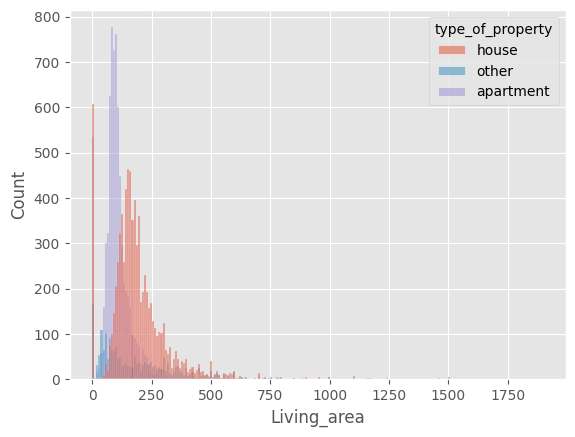

In [36]:
sns.histplot(data=df.query('Living_area < 2000'),
             x='Living_area',
             #y=,
             hue='type_of_property')
plt.show()

In [ ]:
ax = df['Living area'].plot(kind='hist',
                      title='surface Area',
                      #hue='type_of_property',
                      )
ax.set_xlabel('Surface m²')

#### In your opinion, which **5 variables are the most** important and **why?**

Relationship between the attributes

#### What are the **most expensive municipalities in Belgium**? (**Average price, median price, price per square meter**)

#### What are the **most expensive municipalities in Wallonia**? (Average price, median price, price per square meter)

#### What are the **most expensive municipalities in Flanders**? (Average price, median price, price per square meter)

#### What are the less **expensive municipalities in Belgium**? (Average price, median price, price per square meter)

#### What are the less **expensive municipalities in Wallonia**? (Average price, median price, price per square meter)

#### What are the less **expensive municipalities in Flanders**? (Average price, median price, price per square meter)

Regretion, separate the target ('Price') from the data, so you dont have a 100% accuracy !